In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
Url= "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [4]:
titanic = pd.read_csv(Url)

In [5]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [6]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
(titanic.isna().mean())*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
E mbarked       0.224467
dtype: float64

# 20% values in age are missing while 77% are missing for Cabin. So we may drop Cabin 

# Also the Prblem statement states that : You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived so we will not use Cabin

In [8]:
import seaborn as sns

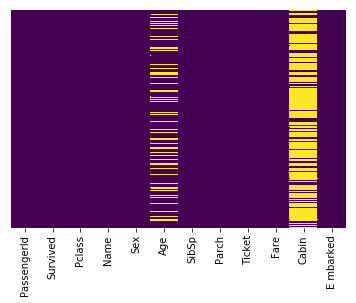

In [9]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
cols = ['PassengerId','Name','Ticket','Cabin','Embarked']

In [11]:
titanic.drop(['PassengerId','Name','Ticket','Cabin','E mbarked'],axis=1,inplace=True)

In [12]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


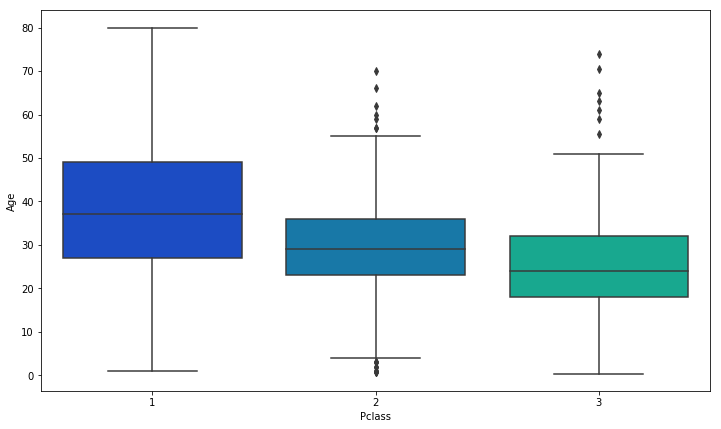

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

# Wealthier passengers in the higher class tend to be older. So we replace missing values in Age with Average age

In [25]:
titanic.where(titanic['Pclass']==1).mean()

Survived     0.629630
Pclass       1.000000
Age         38.233441
SibSp        0.416667
Parch        0.356481
Fare        84.154687
dtype: float64

In [21]:
titanic.where(titanic['Pclass']==2).mean()

Survived     0.472826
Pclass       2.000000
Age         29.877630
SibSp        0.402174
Parch        0.380435
Fare        20.662183
dtype: float64

In [22]:
titanic.where(titanic['Pclass']==3).mean()

Survived     0.242363
Pclass       3.000000
Age         25.140620
SibSp        0.615071
Parch        0.393075
Fare        13.675550
dtype: float64

In [26]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [27]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

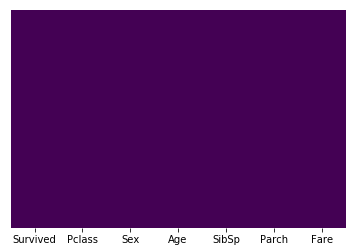

In [28]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


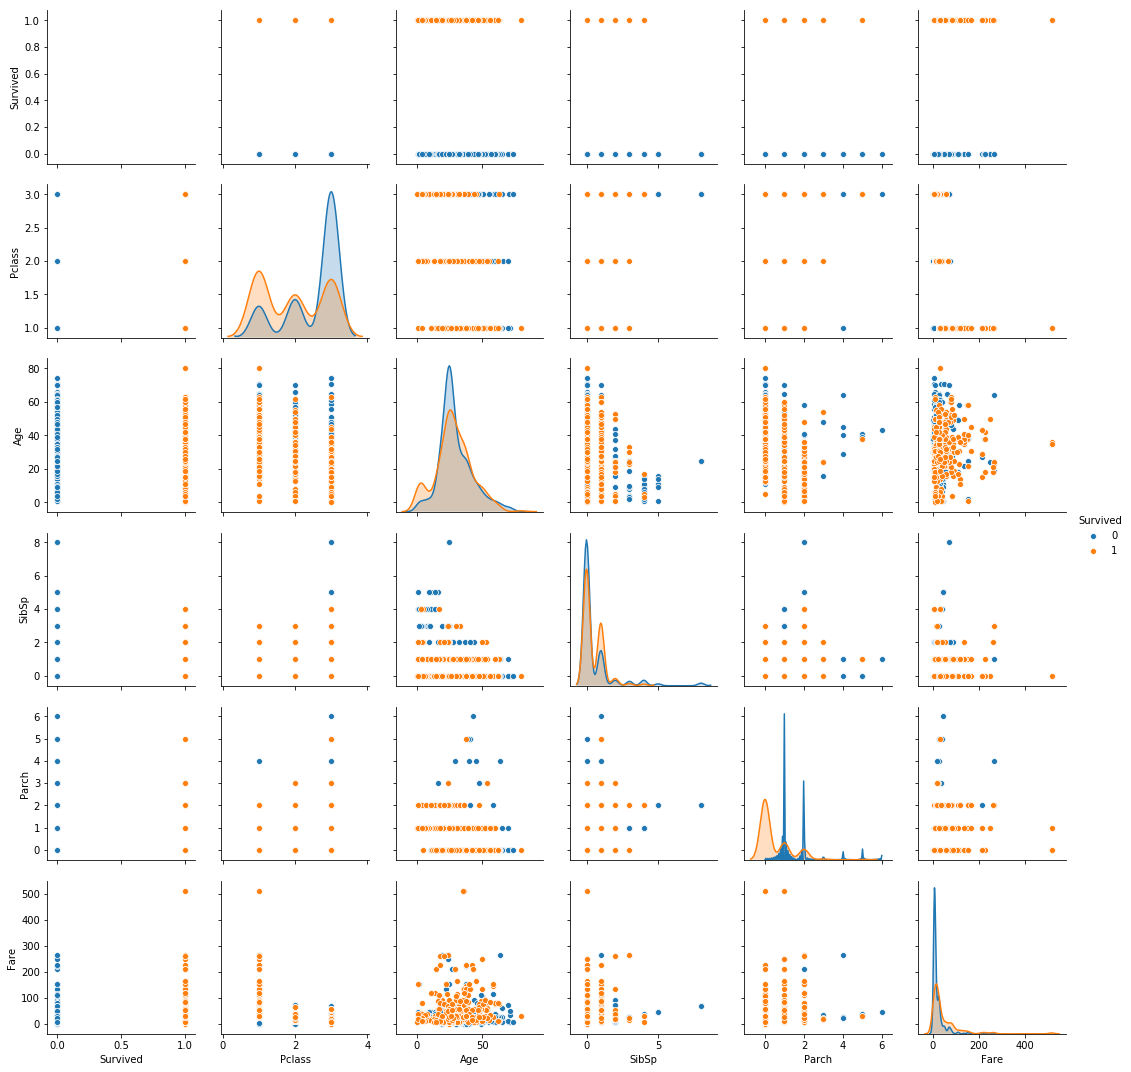

In [29]:
sns.pairplot(titanic, hue='Survived')

# Very evident that Logistic Regression will work

In [30]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


# Converting Categorical Variables

In [31]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [32]:
titanic = pd.concat([titanic,sex],axis=1)

In [34]:
titanic.drop(['Sex'],axis=1,inplace=True)

In [35]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [36]:
X = titanic.drop('Survived', axis =1)
y = titanic['Survived']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion=confusion_matrix(y_test,predictions)

acuracy_sc=accuracy_score(y_test,predictions)
print('Accuracy Score of the Model using Linear Regression is : {}'.format(acuracy_sc)) 

Accuracy Score of the Model using Linear Regression is : 0.7982062780269058


In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       132
           1       0.79      0.68      0.73        91

   micro avg       0.80      0.80      0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223

